In [1]:
import os
import sys
import pathlib


folder_validation_scores = "../models_validation"
folder_validation_scores = pathlib.Path(folder_validation_scores).resolve()


folder_figures = "../plots/"


In [2]:
os.listdir(folder_validation_scores)

['linear_models_epocs',
 'losses_experiment',
 'linear_optimizers',
 'linear_models_time_windows',
 'linear_models_activation',
 'linear_models',
 'linear_models_epocs_optimal_percentage',
 'linear_models_clustering',
 'linear_models_mse',
 'linear_weights']

In [3]:
import pandas as pd


def get_freq_saves_score(exp_folder):
    models_in_exp = [f for f in os.listdir(exp_folder) if os.path.isdir(os.path.join(exp_folder,f))]
    models_paths_in_exp = [os.path.join(exp_folder, f) for f in models_in_exp]
    exp_df = pd.DataFrame()
    for exp_model in models_in_exp:
        exp_model_path = os.path.join(exp_folder, exp_model)
        freq_saves_folder = os.path.join(exp_model_path, "freq_saves")
        list_of_freq_scores = [os.path.join(freq_saves_folder,f) for f in os.listdir(freq_saves_folder) if ".json" in f]
        exp_model_df = pd.DataFrame()
        for frq_json in list_of_freq_scores:
            frq_series = pd.read_json(frq_json,  typ='series')
            exp_model_df = pd.concat([exp_model_df, frq_series.to_frame().T], ignore_index=True)
        
        exp_model_df["name"] = exp_model
        for col in exp_model_df.columns:
            if col in ["name", "erro comp"]:
                continue
            exp_model_df[col] = exp_model_df[col].astype("float")
        exp_model_df = exp_model_df.convert_dtypes()
        if len(exp_model_df)>0:
            exp_model_df.sort_values(by="epoca",inplace=True)
            exp_df = pd.concat([exp_df, exp_model_df], ignore_index=True)

    return exp_df

In [4]:
# Experiment 1 - Arquitectures

exp_folder = os.path.join (folder_validation_scores, "linear_models_epocs")
models_in_exp = [f for f in os.listdir(exp_folder) if os.path.isdir(os.path.join(exp_folder,f))]
models_paths_in_exp = [os.path.join(exp_folder, f) for f in models_in_exp]




scores_df = get_freq_saves_score(exp_folder)

In [5]:
scores_df["alloc missing"] + scores_df["alloc surplus"] 

0                 <NA>
1       4769965.012446
2                 <NA>
3                 <NA>
4       4718949.150597
             ...      
1397    4477412.692931
1398    4473912.019731
1399    4472682.803946
1400     4476731.78777
1401     4474559.99621
Length: 1402, dtype: Float64

In [6]:
scores_df

,name,rmse,abs erro,erro comp,r2 score,mape score,alloc missing,alloc surplus,optimal percentage,better allocation,beter percentage,epoca
0,StackedLSTMA,<NA>,0.0,True,-0.646095,<NA>,<NA>,<NA>,0.0,0.0,0.0,0
1,StackedLSTMA,192.69082,4769965.012446,True,-0.2752,11.706768,2474370.12893,2295594.883516,62.185858,62.185858,88.973612,1
2,StackedLSTMA,<NA>,0.0,True,-0.646095,<NA>,<NA>,<NA>,0.0,0.0,0.0,2
3,StackedLSTMA,<NA>,0.0,True,-0.646095,<NA>,<NA>,<NA>,0.0,0.0,0.0,3
4,StackedLSTMA,217.017332,4718949.150597,True,-0.617503,0.969266,4703054.006395,15895.144202,11.434773,11.434773,85.766507,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1397,VanillaLSTM,170.38755,4477412.692931,True,0.002915,13.868509,2304284.235005,2173128.457925,64.387708,64.387708,89.761823,196
1398,VanillaLSTM,170.362638,4473912.019731,True,0.003207,13.841388,2306988.189665,2166923.830066,64.353438,64.353438,89.747544,197
1399,VanillaLSTM,170.303228,4472682.803946,True,0.003902,13.8359,2305269.364468,2167413.439478,64.350583,64.350583,89.744688,198
1400,VanillaLSTM,170.344472,4476731.78777,True,0.003419,13.874186,2301117.481316,2175614.306454,64.39342,64.39342,89.7504,199


In [7]:
scores_df.sort_values("optimal percentage").set_index("epoca").tail(10)

,name,rmse,abs erro,erro comp,r2 score,mape score,alloc missing,alloc surplus,optimal percentage,better allocation,beter percentage
epoca,,,,,,,,,,,
37,StackedLSTMA,179.700143,5040677.246538,True,-0.109055,17.204912,1843344.211821,3197333.034717,70.75337,70.75337,90.635709
111,UNET,435.221247,13607846.22616,True,-5.505438,55.025426,251361.116248,13356485.109912,70.759082,70.641992,73.489262
30,StackedLSTMA,184.866252,5116694.32173,True,-0.173739,16.687898,1844633.889966,3272060.431764,70.876171,70.876171,90.372972
29,StackedLSTMA,185.877449,5220782.88158,True,-0.186615,17.398168,1775020.205066,3445762.676514,71.841444,71.841444,90.558602
142,VanillaLSTM,225.721348,6061271.859078,True,-0.749853,19.953452,1640226.742212,4421045.116866,72.306945,72.292666,89.490519
36,StackedLSTMA,185.368312,5295774.680573,True,-0.180123,18.742789,1697738.921526,3598035.759047,72.789582,72.789582,91.032671
191,UNET,797.773634,18960257.768652,True,-20.858267,69.170864,241592.904919,18718664.863733,74.020448,73.946196,76.059516
35,StackedLSTMA,193.559685,5621268.904047,True,-0.286726,20.56962,1540714.493521,4080554.410526,74.974297,74.974297,91.429632
196,StackedLSTMA,222.346687,6338799.712698,True,-0.697922,24.086971,1483837.32903,4854962.383669,75.434087,75.431231,91.209733


In [8]:
benchmark_score = {'rmse': 1293.61548667025,
 'abs erro': 30409030.7,
 'erro comp': 'False',
 'r2 score': -56.42534727301383,
 'mape score': 77.85251121882588,
 'alloc missing': 147274.9,
 'alloc surplus': 30261755.8}

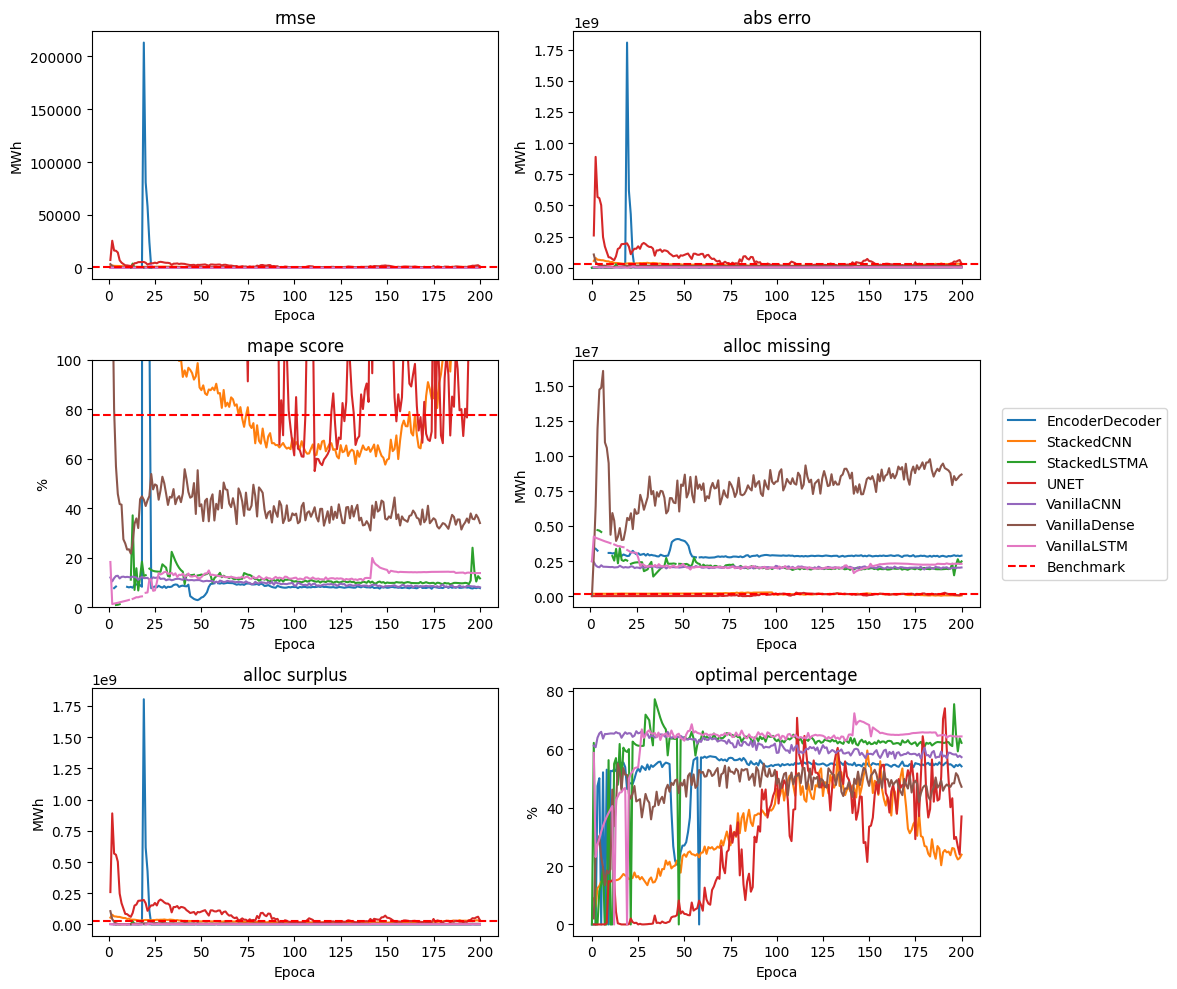

In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np

metrics_to_check = ['rmse', 
    'abs erro', 
                    #'r2 score', 
                    'mape score',
       'alloc missing', 'alloc surplus', 
                    'optimal percentage',
       
                    #'better allocation', 'beter percentage'
]


n_plots = len(metrics_to_check)
sqrt_n_plots = math.ceil(math.sqrt(n_plots))

if sqrt_n_plots > 2:
    ncols = 2
else:
    ncols = sqrt_n_plots
nrows = math.ceil(n_plots / ncols)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
handles = []
labels = []

# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):
    ax = np.array(axes).flatten()[i]
    # Save the list of lines before plotting
    lines_before = ax.get_lines()
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=ax)
    
    # Get the new lines by comparing the list of lines before and after plotting
    lines_after = ax.get_lines()
    new_lines = [line for line in lines_after if line.get_label() not in labels]
    new_labels = [f.get_label() for f in lines_after if f.get_label() not in labels]
    handles += new_lines
    labels += new_labels
    
    np.array(axes).flatten()[i].set_xlabel('Epoca')
    ylabel = "MWh"
    if "perce" in met:
        ylabel = "%"
    if "mape" in met:
        ylabel = "%"
        # Set y-axis limits
        np.array(axes).flatten()[i].set_ylim([0, 100])

    np.array(axes).flatten()[i].set_ylabel(ylabel)
    np.array(axes).flatten()[i].set_title(f'{met}')

    # Add a horizontal line at the benchmark score for this metric
    if met in benchmark_score:
        line = np.array(axes).flatten()[i].axhline(y=benchmark_score[met], color='r', linestyle='--')
        label = "Benchmark"
        if label not in labels:
            handles.append(line)
            labels.append(label)

#a = np.array(axes).flatten()[i].legend()
# Create the legend
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
figure_name = "arch_epocs_results.png"

plt.savefig(os.path.join(folder_figures, figure_name))
plt.show()


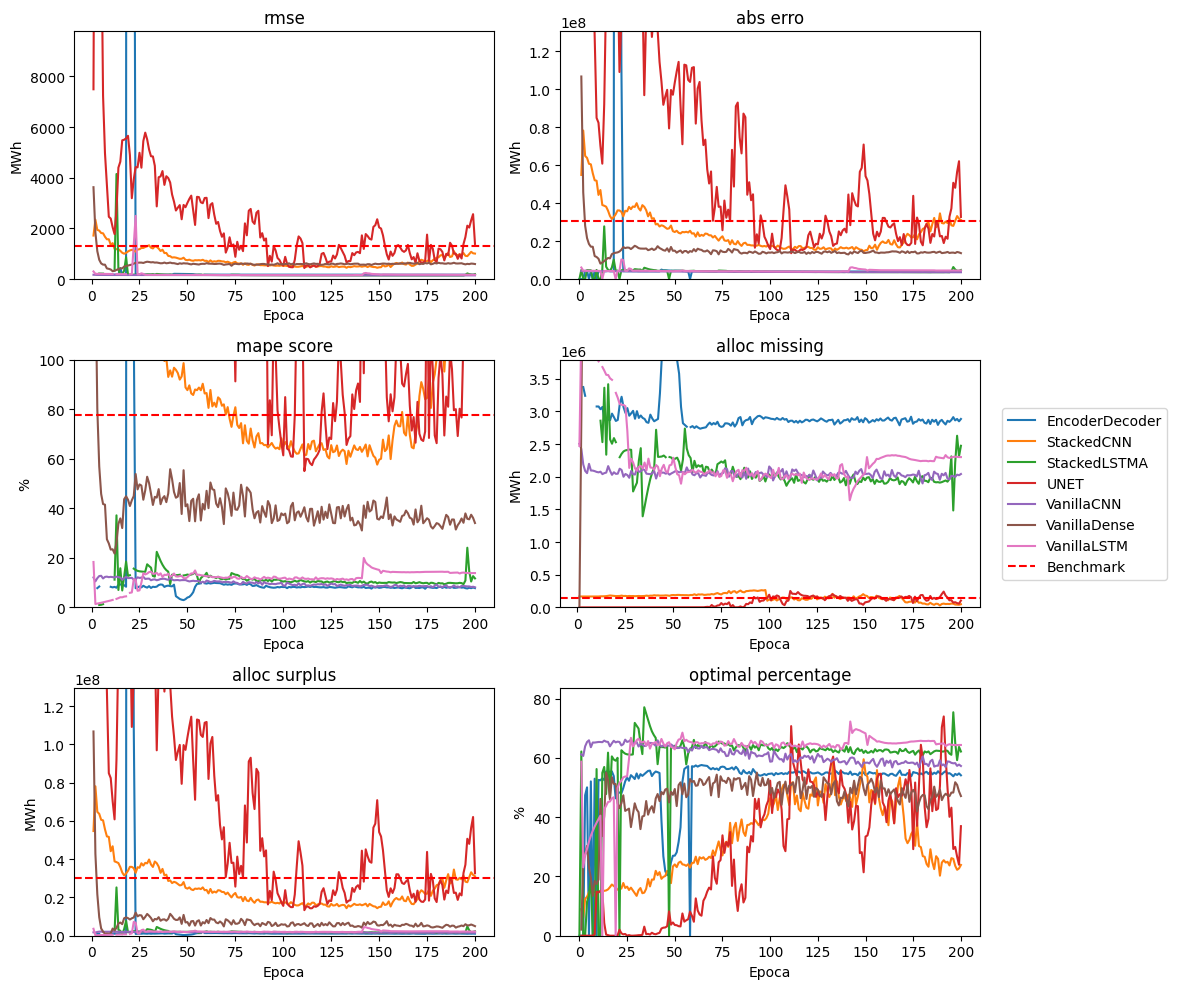

In [10]:
import matplotlib.pyplot as plt
import math
import numpy as np


metrics_to_check = ['rmse', 
    'abs erro', 
                    #'r2 score', 
                    'mape score',
       'alloc missing', 'alloc surplus', 
                    'optimal percentage',
       
                    #'better allocation', 'beter percentage'
]


n_plots = len(metrics_to_check)
sqrt_n_plots = math.ceil(math.sqrt(n_plots))

if sqrt_n_plots > 2:
    ncols = 2
else:
    ncols = sqrt_n_plots
nrows = math.ceil(n_plots / ncols)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

handles = []
labels = []

# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):
    ax = np.array(axes).flatten()[i]
    # Save the list of lines before plotting
    lines_before = ax.get_lines()
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=ax)
    
    # Get the new lines by comparing the list of lines before and after plotting
    lines_after = ax.get_lines()
    new_lines = [line for line in lines_after if line.get_label() not in labels]
    new_labels = [f.get_label() for f in lines_after if f.get_label() not in labels]
    handles += new_lines
    labels += new_labels
    
    # Calculate mean and standard deviation
    mean = scores_df.groupby('name')[met].mean().mean()
    std = scores_df.groupby('name')[met].std().mean()
    # Set y-axis limits
    np.array(axes).flatten()[i].set_ylim([0, mean + 3*std])
    
    np.array(axes).flatten()[i].set_xlabel('Epoca')
    ylabel = "MWh"
    if "perce" in met:
        ylabel = "%"
    if "mape" in met:
        ylabel = "%"
        # Set y-axis limits
        np.array(axes).flatten()[i].set_ylim([0, 100])
        
    # Add a horizontal line at the benchmark score for this metric
    if met in benchmark_score:
        np.array(axes).flatten()[i].axhline(y=benchmark_score[met], color='r', linestyle='--')
        label = "Benchmark"
        if label not in labels:
            handles.append(line)
            labels.append(label)
            
    np.array(axes).flatten()[i].set_ylabel(ylabel)
    np.array(axes).flatten()[i].set_title(f'{met}')
    
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
figure_name = "arch_epocs_results_no_outliers.png"

plt.savefig(os.path.join(folder_figures, figure_name))
plt.show()

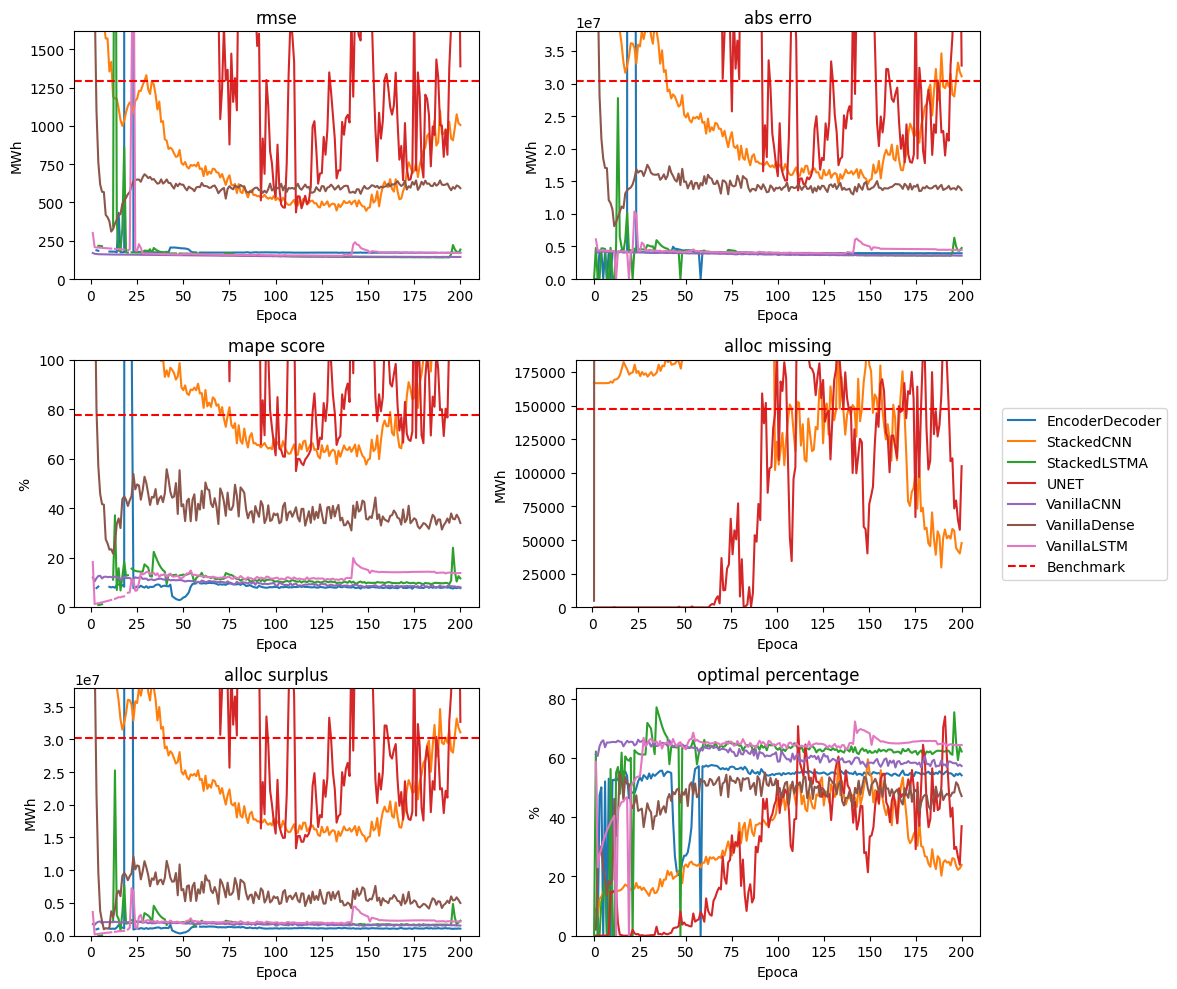

In [11]:
import matplotlib.pyplot as plt
import math
import numpy as np


metrics_to_check = ['rmse', 
    'abs erro', 
                    #'r2 score', 
                    'mape score',
       'alloc missing', 'alloc surplus', 
                    'optimal percentage',
       
                    #'better allocation', 'beter percentage'
]


n_plots = len(metrics_to_check)
sqrt_n_plots = math.ceil(math.sqrt(n_plots))

if sqrt_n_plots > 2:
    ncols = 2
else:
    ncols = sqrt_n_plots
nrows = math.ceil(n_plots / ncols)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

handles = []
labels = []
# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):

    ax = np.array(axes).flatten()[i]
    # Save the list of lines before plotting
    lines_before = ax.get_lines()
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=ax)
    
    # Get the new lines by comparing the list of lines before and after plotting
    lines_after = ax.get_lines()
    new_lines = [line for line in lines_after if line.get_label() not in labels]
    new_labels = [f.get_label() for f in lines_after if f.get_label() not in labels]
    handles += new_lines
    labels += new_labels
    
    # Calculate mean and standard deviation
    mean = scores_df.groupby('name')[met].mean().mean()
    std = scores_df.groupby('name')[met].std().mean()
    ylimit = mean + 3*std

    # Add a horizontal line at the benchmark score for this metric
    if met in benchmark_score:
        ylimit = benchmark_score[met]/0.8
        np.array(axes).flatten()[i].axhline(y=benchmark_score[met], color='r', linestyle='--')
        label = "Benchmark"
        if label not in labels:
            handles.append(line)
            labels.append(label)
    
    
    np.array(axes).flatten()[i].set_xlabel('Epoca')
    ylabel = "MWh"
    if "perce" in met:
        ylabel = "%"
    if "mape" in met:
        ylabel = "%"
        ylimit = 100
        

    # Set y-axis limits
    np.array(axes).flatten()[i].set_ylim([0, ylimit])
    np.array(axes).flatten()[i].set_ylabel(ylabel)
    np.array(axes).flatten()[i].set_title(f'{met}')
    
    
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
figure_name = "arch_epocs_results_near_benchmark.png"

plt.savefig(os.path.join(folder_figures, figure_name))
plt.show()

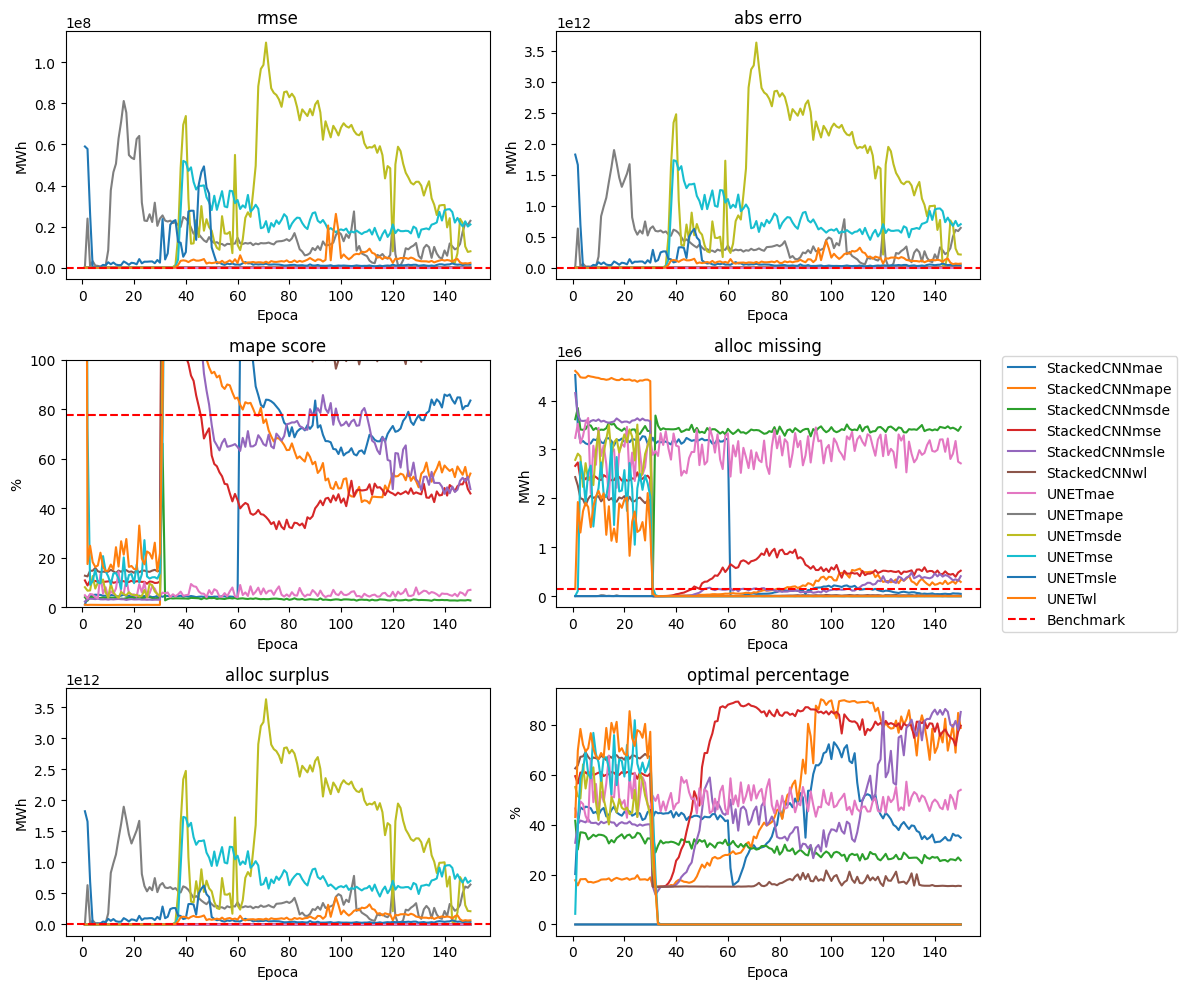

In [12]:
# Experiment 2 - losses
exp_folder = os.path.join (folder_validation_scores, "losses_experiment")
scores_df = get_freq_saves_score(exp_folder)
scores_df = scores_df[scores_df["name"].str.contains('UNET') | scores_df["name"].str.contains('StackedCNN')]

n_plots = len(metrics_to_check)
sqrt_n_plots = math.ceil(math.sqrt(n_plots))

if sqrt_n_plots > 2:
    ncols = 2
else:
    ncols = sqrt_n_plots
nrows = math.ceil(n_plots / ncols)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
handles = []
labels = []

# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):
    ax = np.array(axes).flatten()[i]
    # Save the list of lines before plotting
    lines_before = ax.get_lines()
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=ax)
    
    # Get the new lines by comparing the list of lines before and after plotting
    lines_after = ax.get_lines()
    new_lines = [line for line in lines_after if line.get_label() not in labels]
    new_labels = [f.get_label() for f in lines_after if f.get_label() not in labels]
    handles += new_lines
    labels += new_labels
    
    np.array(axes).flatten()[i].set_xlabel('Epoca')
    ylabel = "MWh"
    if "perce" in met:
        ylabel = "%"
    if "mape" in met:
        ylabel = "%"
        # Set y-axis limits
        np.array(axes).flatten()[i].set_ylim([0, 100])

    np.array(axes).flatten()[i].set_ylabel(ylabel)
    np.array(axes).flatten()[i].set_title(f'{met}')

    # Add a horizontal line at the benchmark score for this metric
    if met in benchmark_score:
        line = np.array(axes).flatten()[i].axhline(y=benchmark_score[met], color='r', linestyle='--')
        label = "Benchmark"
        if label not in labels:
            handles.append(line)
            labels.append(label)

#a = np.array(axes).flatten()[i].legend()
# Create the legend
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
figure_name = "losses_epocs_results.png"

plt.savefig(os.path.join(folder_figures, figure_name))
plt.show()


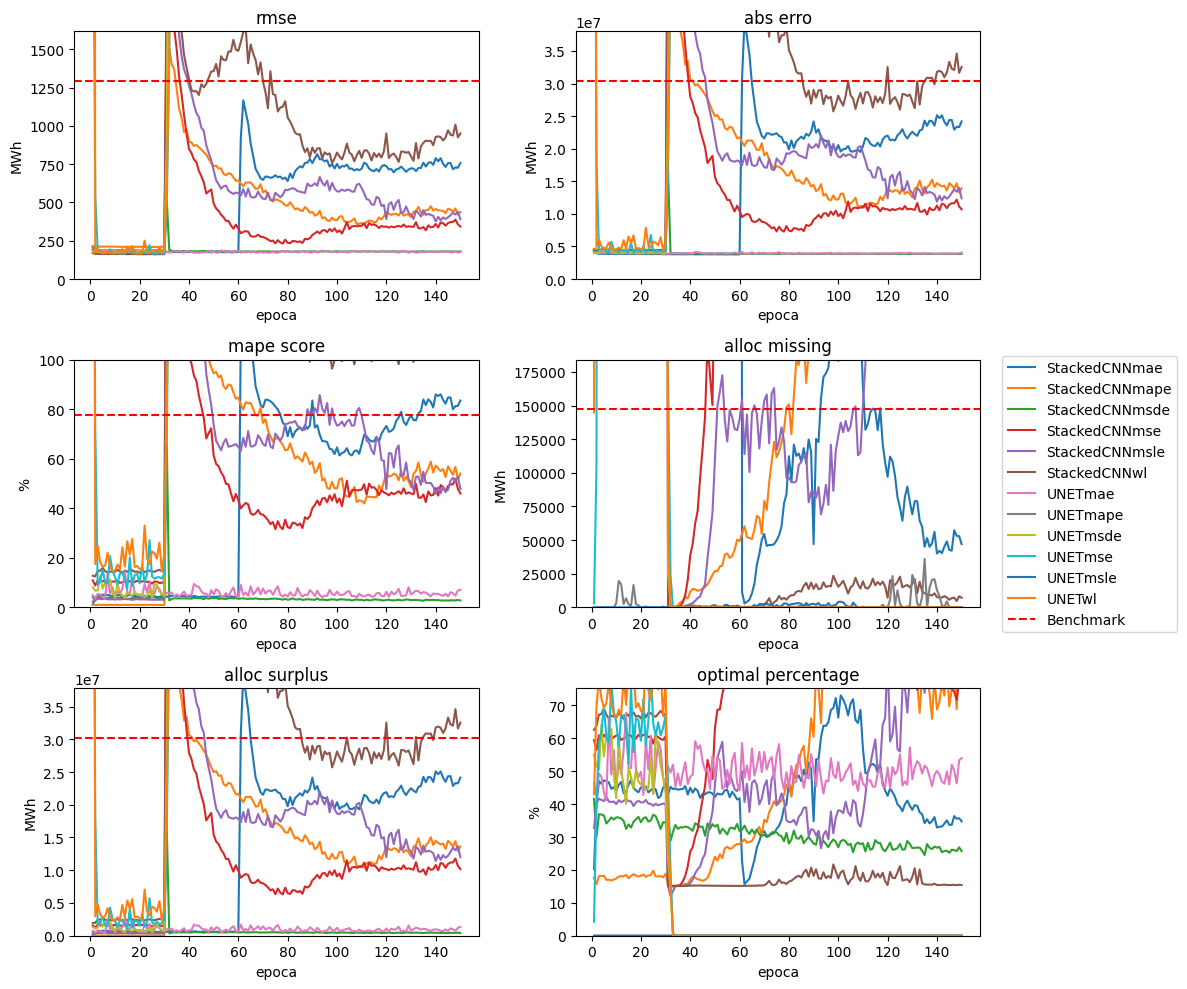

In [13]:
# Experiment 2 - losses
exp_folder = os.path.join (folder_validation_scores, "losses_experiment")
scores_df = get_freq_saves_score(exp_folder)
scores_df = scores_df[scores_df["name"].str.contains('UNET') | scores_df["name"].str.contains('StackedCNN')]
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))


handles = []
labels = []

# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):

    ax = np.array(axes).flatten()[i]
    # Save the list of lines before plotting
    lines_before = ax.get_lines()
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=ax)
    
    # Get the new lines by comparing the list of lines before and after plotting
    lines_after = ax.get_lines()
    new_lines = [line for line in lines_after if line.get_label() not in labels]
    new_labels = [f.get_label() for f in lines_after if f.get_label() not in labels]
    handles += new_lines
    labels += new_labels
    
    # Calculate mean and standard deviation
    mean = scores_df.groupby('name')[met].mean().mean()
    std = scores_df.groupby('name')[met].std().mean()
    ylimit = mean + 3*std




    # Add a horizontal line at the benchmark score for this metric
    if met in benchmark_score:
        ylimit = benchmark_score[met]/0.8
        np.array(axes).flatten()[i].axhline(y=benchmark_score[met], color='r', linestyle='--')
        label = "Benchmark"
        if label not in labels:
            handles.append(line)
            labels.append(label)

    ylabel = "MWh"
    if "perce" in met:
        ylabel = "%"
    if "mape" in met:
        ylabel = "%"
        ylimit = 100
        

    # Set y-axis limits
    np.array(axes).flatten()[i].set_ylim([0, ylimit])
    np.array(axes).flatten()[i].set_ylabel(ylabel)
    np.array(axes).flatten()[i].set_title(f'{met}')
    

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
figure_name = "losses_results_near_benchmark.png"

plt.savefig(os.path.join(folder_figures, figure_name))
plt.show()

In [14]:
no_missin_scores = scores_df[scores_df["bscore m"]>=0]
no_missin_scores = no_missin_scores[no_missin_scores["bscore s"]>=0]


In [15]:
no_missin_scores

,name,rmse,abs erro,r2 score,mape score,alloc missing,alloc surplus,optimal percentage,beter percentage,bscore m,bscore s,bscore,epoca
1,UNETmse,544.370354,18143806.137793,-9.177598,72.329108,106220.492535,18037585.645258,40.649989,42.286383,0.27876,0.403948,0.682708,2
214,StackedCNNmae,884.419992,29993032.260535,-25.864173,108.120136,10450.827588,29982581.432947,20.239319,20.407814,0.929039,0.009225,0.938264,65
215,StackedCNNmae,803.844694,27136671.520874,-21.192216,98.974088,17481.214319,27119190.306555,23.040896,23.372173,0.881302,0.103846,0.985148,66
216,StackedCNNmae,719.354616,24164992.271155,-16.772251,89.220636,31713.330151,24133278.941003,26.799178,27.378912,0.784666,0.202516,0.987181,67
217,StackedCNNmae,690.328192,23122056.980957,-15.366944,85.701413,39660.644312,23082396.336646,28.721156,29.41798,0.730703,0.237242,0.967945,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,StackedCNNmsle,571.246342,18693368.261453,-10.207358,73.3039,146775.560156,18546592.701297,41.206877,42.80329,0.003391,0.387128,0.390518,106
1157,StackedCNNmsle,615.81638,20223753.213474,-12.024434,79.169923,113023.723804,20110729.48967,34.224355,35.723669,0.232566,0.335441,0.568007,108
1158,StackedCNNmsle,621.620196,20385034.579807,-12.27109,80.474542,115291.697742,20269742.882065,33.179118,34.704135,0.217167,0.330186,0.547353,109
1380,UNETmsde,931.042567,28851733.787201,-28.771139,101.233256,25330.781488,28826403.005713,23.098012,23.537811,0.828003,0.047431,0.875435,31


In [19]:
cuttoff_df[cuttoff_df["bscore"]>=0]["name"].value_counts()

name
StackedCNNmae     66
StackedCNNmsle    53
StackedCNNwl      47
StackedCNNmape    38
StackedCNNmse      7
UNETmse            1
UNETmsde           1
UNETwl             1
Name: count, dtype: Int64

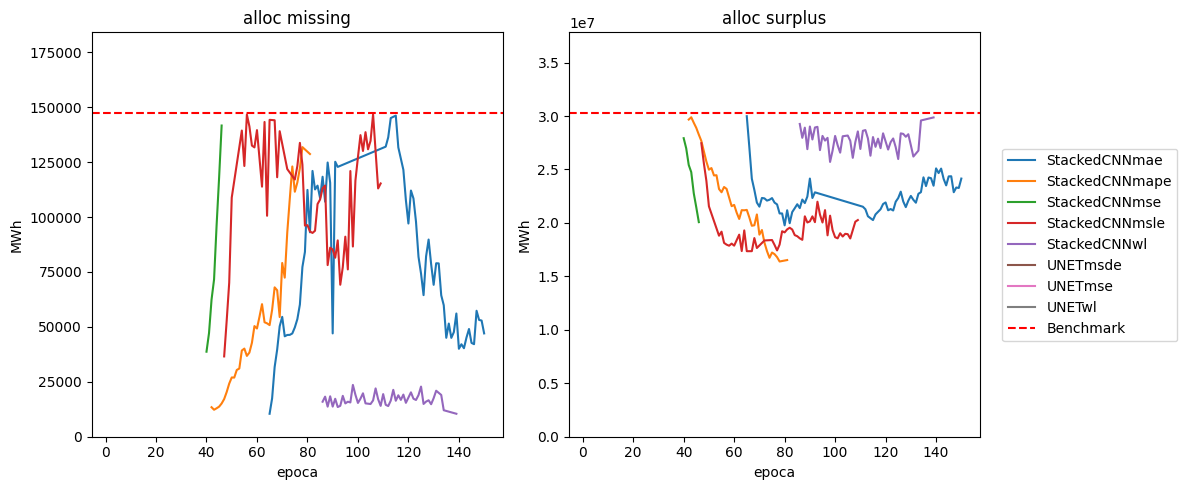

In [18]:

metrics_to_check = [#'rmse', 
    #'abs erro', 
                    #'r2 score', 
     #               'mape score',
       'alloc missing', 'alloc surplus', 
                  #  'optimal percentage',
                    #'better allocation', 'beter percentage'
]

# Experiment 2 - losses
exp_folder = os.path.join (folder_validation_scores, "losses_experiment")
scores_df = get_freq_saves_score(exp_folder)
scores_df = scores_df[scores_df["name"].str.contains('UNET') | scores_df["name"].str.contains('StackedCNN')]
n_plots = len(metrics_to_check)
sqrt_n_plots = math.ceil(math.sqrt(n_plots))

if sqrt_n_plots > 2:
    ncols = 2
else:
    ncols = sqrt_n_plots
nrows = math.ceil(n_plots / ncols)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))

handles = []
labels = []

cuttoff_df = scores_df.copy()
#b_score_mean = cuttoff_df.groupby('name')["bscore"].mean()
#names_good_bscore = cuttoff_df[cuttoff_df["bscore"]>=0]["name"].unique()
#cuttoff_df = cuttoff_df[cuttoff_df["name"].isin(names_good_bscore)]

cuttoff_df = cuttoff_df[cuttoff_df["bscore m"]>=0]
cuttoff_df = cuttoff_df[cuttoff_df["bscore s"]>=0]
cuttoff_df = cuttoff_df[cuttoff_df["bscore s"]>=0]


# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):
    filtered_scores_df = cuttoff_df.copy()
    ax = np.array(axes).flatten()[i]
    # Save the list of lines before plotting
    lines_before = ax.get_lines()

    # Calculate mean and standard deviation
    mean_all = scores_df.groupby('name')[met].mean()
    mean = mean_all.mean()
    std_all = scores_df.groupby('name')[met].std()
    std = std_all.mean()
    ylimit = mean + 3*std

    
    filtered_scores_df.set_index("epoca").groupby('name')[met].plot(ax=ax)
    
    # Get the new lines by comparing the list of lines before and after plotting
    lines_after = ax.get_lines()
    new_lines = [line for line in lines_after if line.get_label() not in labels]
    new_labels = [f.get_label() for f in lines_after if f.get_label() not in labels]
    handles += new_lines
    labels += new_labels
    





    # Add a horizontal line at the benchmark score for this metric
    if met in benchmark_score:
        ylimit = benchmark_score[met]/0.8
        np.array(axes).flatten()[i].axhline(y=benchmark_score[met], color='r', linestyle='--')
        label = "Benchmark"
        if label not in labels:
            handles.append(line)
            labels.append(label)

    ylabel = "MWh"
    if "perce" in met:
        ylabel = "%"
    if "mape" in met:
        ylabel = "%"
        ylimit = 100
        

    # Set y-axis limits
    np.array(axes).flatten()[i].set_ylim([0, ylimit])
    np.array(axes).flatten()[i].set_ylabel(ylabel)
    np.array(axes).flatten()[i].set_title(f'{met}')
    

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
figure_name = "losses_results_near_benchmark_cutoff.png"

plt.savefig(os.path.join(folder_figures, figure_name))
plt.show()

name
StackedCNNwl      116
StackedCNNmae      83
StackedCNNmsle     78
StackedCNNmape     62
StackedCNNmse      16
UNETmse             3
UNETwl              2
UNETmsde            1
Name: count, dtype: Int64

In [ ]:
# Experiment 3 - linear_optimizers
exp_folder = os.path.join (folder_validation_scores, "linear_optimizers")
scores_df = get_freq_saves_score(exp_folder)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))


handles = []
labels = []

# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=np.array(axes).flatten()[i])
    np.array(axes).flatten()[i].set_xlabel('Epoca')
    np.array(axes).flatten()[i].set_ylabel(met)
    np.array(axes).flatten()[i].set_title(f'Plot of {met} by Name')
    
np.array(axes).flatten()[i].legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_3207/1430405150.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


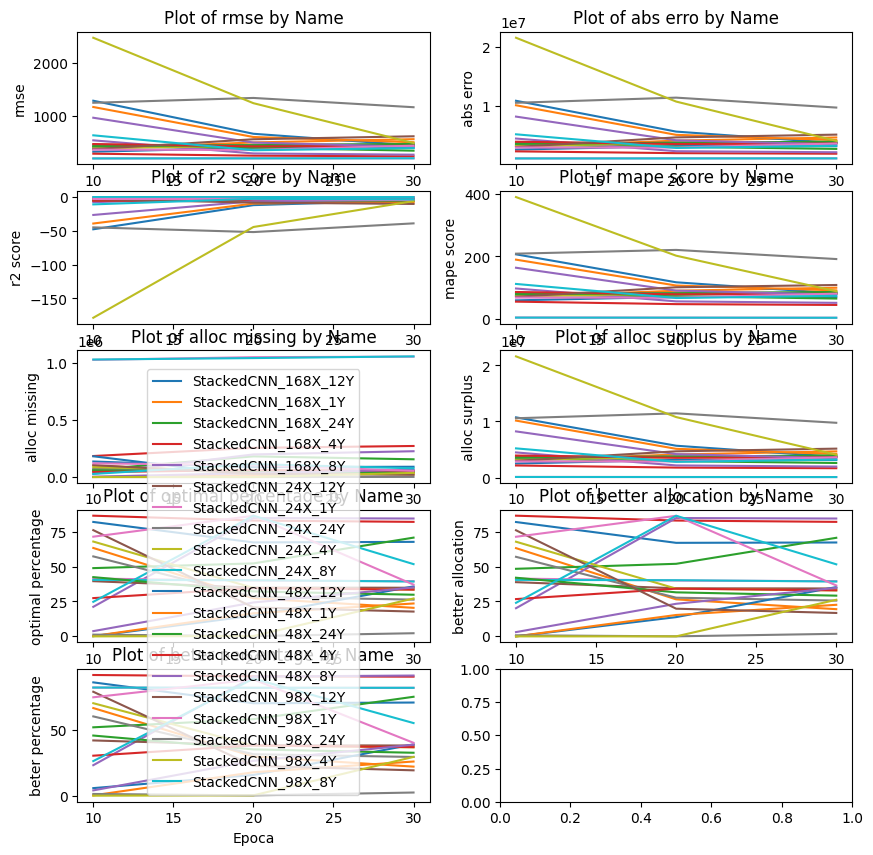

In [111]:
# Experiment 4 - time windows
exp_folder = os.path.join (folder_validation_scores, "linear_models_time_windows")
scores_df = get_freq_saves_score(exp_folder)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=np.array(axes).flatten()[i])
    np.array(axes).flatten()[i].set_xlabel('Epoca')
    np.array(axes).flatten()[i].set_ylabel(met)
    np.array(axes).flatten()[i].set_title(f'Plot of {met} by Name')
    
np.array(axes).flatten()[i].legend()

plt.tight_layout()
plt.show()

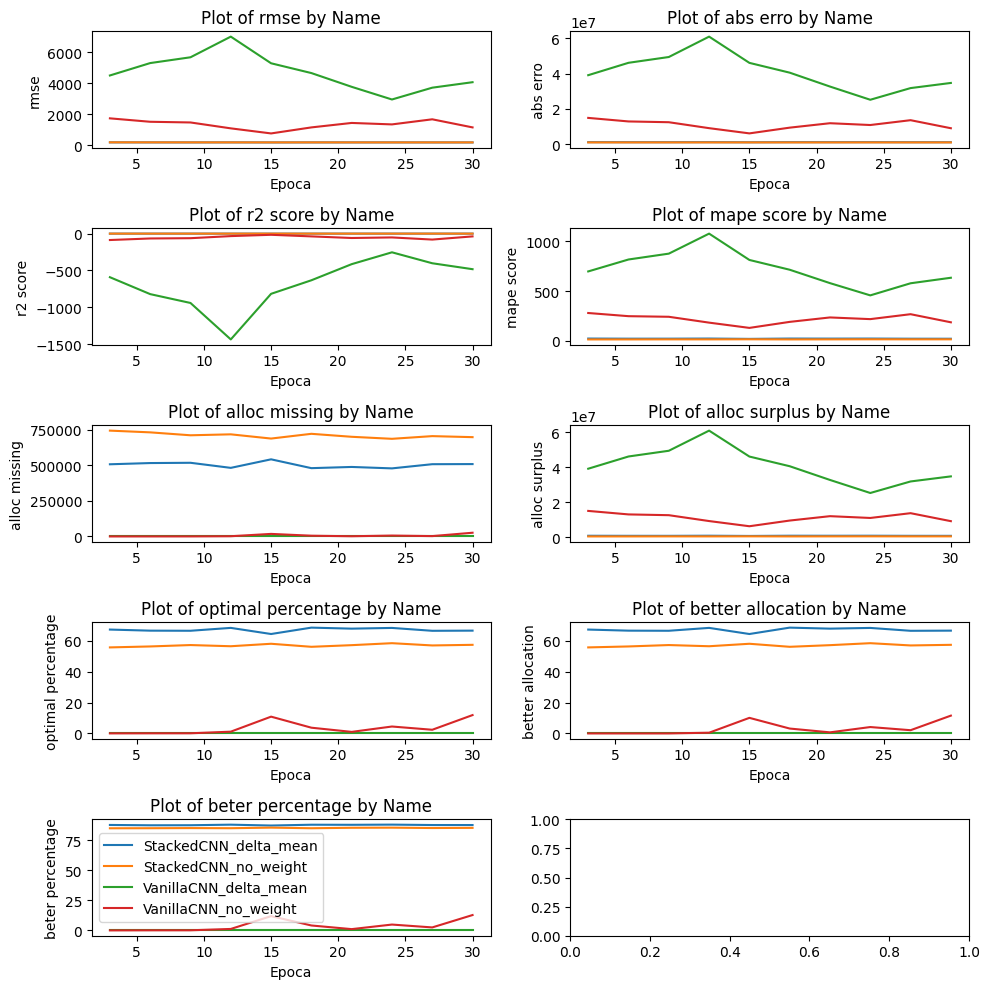

In [112]:
# Experiment  6 - Pesos
exp_folder = os.path.join (folder_validation_scores, "linear_weights")
scores_df = get_freq_saves_score(exp_folder)
# Create a grid of subplots with the desired number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Iterate over each metric and plot it on a separate subplot
for i, met in enumerate(metrics_to_check):
    scores_df.set_index("epoca").groupby('name')[met].plot(ax=np.array(axes).flatten()[i])
    np.array(axes).flatten()[i].set_xlabel('Epoca')
    np.array(axes).flatten()[i].set_ylabel(met)
    np.array(axes).flatten()[i].set_title(f'Plot of {met} by Name')
    
np.array(axes).flatten()[i].legend()

plt.tight_layout()
plt.show()